# Part II - (Ford Go Bike Findings)
<center>
 <h2>By Mohamed Samir</h2>
</center>

## Investigation Overview
In this presentation, i will operations done on the dataset and discuss main findings for the dataset and show visualizations for each finding. 

## Dataset Overview and Executive Summary
The Ford Go Bike trip dataset has data for bike sharing system in San Francisco, USA. This data has information for each user trip with each user information and trip data from starting location and starting date. 

The dataset had main columns and some of them were converted to other types like datetime and other operations were done on some columns to create new columns.

In preliminary wrangling i checked for the shape and columns of the data and its data types. The dataset didn't have any duplicates,  there were some NANs in certain columns but they were small percentage of columns. I have done one dataset transformation which after i have done the wrangling i exported the dataset into `.pickle` file.


After that i started ploting the following visuals.


In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
df = pd.read_pickle('../Datasets/df.pkl')

## Visualization 1
In this line plot, it shows distance against start hour of each trip.
### Observation
The interesting observation is that the people tend to make longer or frequent trips at 5AM which shows interesting socital behavior.

Text(0, 0.5, 'Distance')

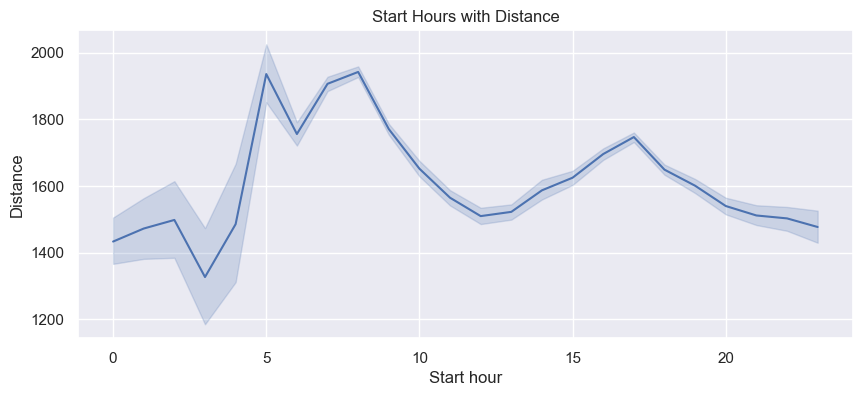

In [19]:
# Line plot between start_hour and distance
plt.figure(figsize=(10,4))
sns.lineplot(x='start_hour', y='distance', data=df)
plt.title('Start Hours with Distance')
plt.xlabel('Start hour')
plt.ylabel('Distance')

## Visualization 2
The following plot shows Start day of each trip against distance, in this plot there are two observations.

### Observations
The first observation is that the least value for distance is on Sundays and Saterdays, which means that there is low number of trips or short trips done on those two days. 

The second observation is that the largest values for distance is on Thursdays and Fridays which means that people tend to use bikes more often in Holidays than in normal days.

Text(0, 0.5, 'Distance')

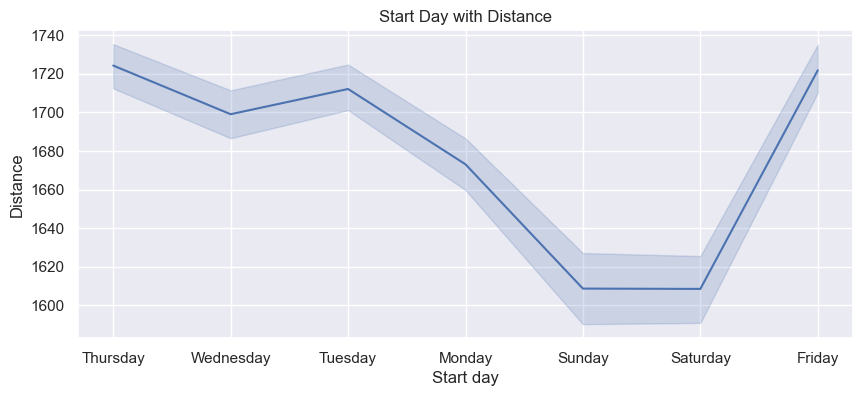

In [20]:
# Line plot between start_day and distance
plt.figure(figsize=(10,4))
sns.lineplot(x='start_day', y='distance', data=df)
plt.title('Start Day with Distance')
plt.xlabel('Start day')
plt.ylabel('Distance')

## Visualization 3
In this subplot there are box plots, the first shows distribution of trip duration in seconds, the second shows distribution for distances.

Both visualizations are bivariate that are split according to gender of user.

### Observations 
The first observation is that men tend to have trips with less duration unlike women. 

The second observation is for the second plot which shows that men also tend to have trips for short distanes unlike women.

*These two observations would lead to the next interesting observation* 

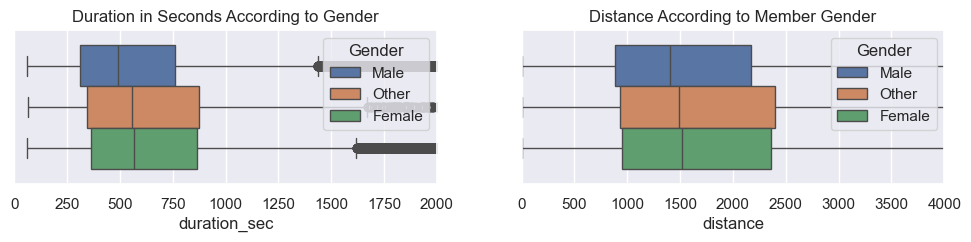

In [21]:
figs, ax = plt.subplots(1, 2, figsize=(12, 2))

ax_flat = ax.flatten()

# Box plots of duration_sec with second variable which is member's gender 
sns.boxplot(data=df, x='duration_sec',hue='member_gender', ax=ax_flat[0])
ax_flat[0].set_xlim(0, 2000)
ax_flat[0].set_title("Duration in Seconds According to Gender")
ax_flat[0].legend(title='Gender', loc='upper right')

sns.boxplot(data=df, x='distance',hue='member_gender', ax=ax_flat[1])
ax_flat[1].set_xlim(0, 4000)
ax_flat[1].set_title("Distance According to Member Gender")
ax_flat[1].legend(title='Gender', loc='upper right')


## Visualization 4
This count plot shows the counts of trips made according for each gender of the different users.

### Observations
This shows a high number of trips on Thursdays and Fridays which is the observation we found before. However, the new observation seen here is that there is a great amount of Male users who do those trips.

By linking this observation to the third observation we can see that men tend to have short distances for short periods of time but they also have a lot of trips much greater than the trips women do.

Text(0, 0.5, 'Count of Trips')

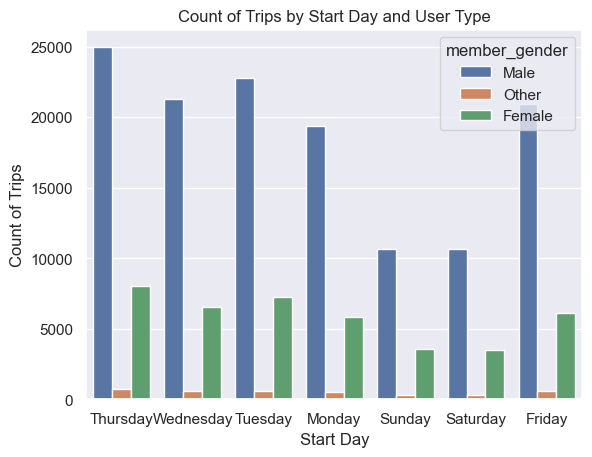

In [22]:
sns.countplot(data=df, x='start_day', hue='member_gender')
plt.title('Count of Trips by Start Day and User Type')
plt.xlabel('Start Day')
plt.ylabel('Count of Trips')

<center>
<h3>The end</h3>
Thanks for you patience in reading this.
</center> 

#### Converting Notebook
Using `nbconvert`

In [23]:
import nbformat
from nbconvert import HTMLExporter

# Load the notebook
with open('Part_I_exploration_template.ipynb') as f:
  notebook = nbformat.read(f, as_version=4)

# Convert the notebook to HTML
html_exporter = HTMLExporter()
html_data, resources = html_exporter.from_notebook_node(notebook)

# Save the HTML output
with open('../Part_II_exploration_template.html', 'w') as f:
  f.write(html_data)